# **Project Overview**

*   Main Objectives:





Here Are Some Main Objectives One can choose Doing a project on this dataset:
*   **Segmenting users** into distinct groups based on how they interact with the website (browsing behavior, purchase history etc.). This helps personalize marketing efforts and product recommendations.
*   **Predicting user** purchases to identify users more likely to buy. This allows for targeted advertising and promotions.


*   **Analyzing traffic patterns** to forecast website traffic and identify trends. This can be used to optimize website content and server capacity to handle traffic surges.

We are Primarily Focus on the Analyzing traffic patterns






# Analysis of Dataset

*  **Data Exploration**






# 1.   **User Behavior Analysis:**
   

  *   Analyze how users navigate the website. This can involve tracking typical page sequences and identifying common drop-off points where users abandon the website.
  *   Analyze which products are most viewed, added to carts, and purchased. This can help identify popular products and areas for improvement.







# 2.    **User Acquisition Analysis:**

*   Segment users by their acquisition channel (organic search, paid ads, social media etc.) if a source column is present. This helps identify the most effective channels for attracting visitors.
*  Analyze metrics like number of sessions or total time spent on site to understand acquisition trends.







# Traffic Source Analysis:

SELECT trafficSource.source, trafficsource.medium, COUNT(*) AS sessions

FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`

GROUP BY source, medium

ORDER BY sessions DESC

LIMIT 10;

# **User Acquisition Over Time:**

SELECT date AS session_date, COUNT(*) AS sessions

FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`

GROUP BY session_date

ORDER BY session_date ASC;

# Top Pages Viewed:

SELECT
  hit.page.pagePath AS page_path,
  COUNT(*)
  
  AS page_views

FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
   AS
   session,
  
  UNNEST(hits) AS hit

GROUP BY
  
  hit.page.pagePath

ORDER BY
  
  page_views DESC

LIMIT
  10;

# Setting Up BigQuery and Dependencies:

Run the cells below (shift + enter) to authenticate your project.

Note that you need to fill in the project_id variable with the Google Cloud project id you are using for this course. You can see your project ID by going to https://console.cloud.google.com/cloud-resource-manager

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "Your_Project_ID"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

# Data Visualization

Use tools like Python Library matplotlib to visualize your findings from the "ga_sessions_366" table. Charts and graphs can help reveal patterns and trends in user behavior.

In [ ]:
# Add imports for any visualization libraries you may need
import matplotlib.pyplot as plt
import pandas as pd
from google.cloud import bigquery
project_id = "oval-sunset-367409"



#    New Visitors To Website






*   1.	Which combination of source and medium (e.g., organic search, social media) is most likely to bring new visitors to the website?




In [ ]:
%%bigquery --project $project_id
SELECT trafficSource.source, trafficsource.medium, COUNT(DISTINCT visitId) AS new_visitors
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitNumber = 1  -- Assuming new visitors have visit_number = 1
GROUP BY trafficSource.source, trafficsource.medium
ORDER BY new_visitors DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,source,medium,new_visitors
0,(direct),(none),1547
1,youtube.com,referral,169
2,Partners,affiliate,42
3,analytics.google.com,referral,38
4,google.com,referral,11
5,quora.com,referral,5
6,baidu,organic,4
7,groups.google.com,referral,3
8,l.facebook.com,referral,3
9,m.facebook.com,referral,3


In [ ]:
client = bigquery.Client(project =project_id )
query = """
SELECT trafficSource.source, trafficsource.medium, COUNT(DISTINCT visitId) AS new_visitors
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitNumber = 1  -- Assuming new visitors have visit_number = 1
GROUP BY trafficSource.source, trafficsource.medium
ORDER BY new_visitors DESC
LIMIT 10;
"""

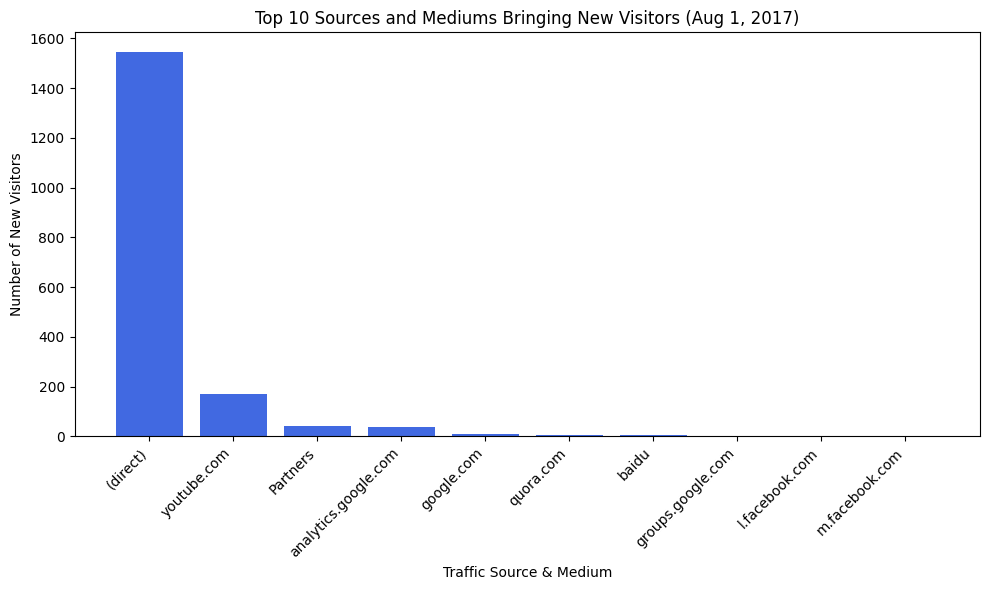

In [ ]:
results = client.query(query).to_dataframe()
sources = results['source'].tolist()  # List of traffic sources
media = results['medium'].tolist()  # List of mediums
new_visitors = results['new_visitors'].tolist()  # List of new visitors for each combination

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Use a bar chart instead of scatter for this data (categorical on x-axis)
bars = plt.bar(sources, new_visitors, color='royalblue')  # Create bars with custom color

# Customize the chart
plt.title("Top 10 Sources and Mediums Bringing New Visitors (Aug 1, 2017)")
plt.xlabel("Traffic Source & Medium")
plt.ylabel("Number of New Visitors")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing between elements

# Optional: Add labels above bars (uncomment if desired)
# for bar, visitor_count in zip(bars, new_visitors):
#     plt.text(bar.get_x() + bar.get_width() / 2, visitor_count + 5, visitor_count, ha='center')

plt.show()


# Web Traffic From Different Compaigns



*   	How much website traffic can be expected from different marketing campaigns




In [ ]:
%%bigquery --project $project_id
SELECT trafficSource.campaign, trafficSource.source, trafficSource.medium, SUM(totals.visits) AS total_sessions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
GROUP BY trafficSource.campaign, trafficSource.source, trafficSource.medium
ORDER BY total_sessions DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,campaign,source,medium,total_sessions
0,(not set),(direct),(none),2166
1,(not set),youtube.com,referral,180
2,(not set),analytics.google.com,referral,57
3,Data Share Promo,Partners,affiliate,52
4,(not set),dfa,cpm,15
5,(not set),google.com,referral,12
6,(not set),sites.google.com,referral,8
7,(not set),facebook.com,referral,7
8,(not set),quora.com,referral,6
9,(not set),baidu,organic,5


In [ ]:
client = bigquery.Client(project =project_id )
query = """
SELECT trafficSource.campaign, trafficSource.source, trafficSource.medium, SUM(totals.visits) AS total_sessions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
GROUP BY trafficSource.campaign, trafficSource.source, trafficSource.medium
ORDER BY total_sessions DESC;
"""

Top 10 Traffic Sources and Mediums (Total Sessions):
              source    medium  total_sessions
            (direct)    (none)            2166
         youtube.com  referral             180
analytics.google.com  referral              57
            Partners affiliate              52
                 dfa       cpm              15
          google.com  referral              12
    sites.google.com  referral               8
        facebook.com  referral               7
           quora.com  referral               6
               baidu   organic               5


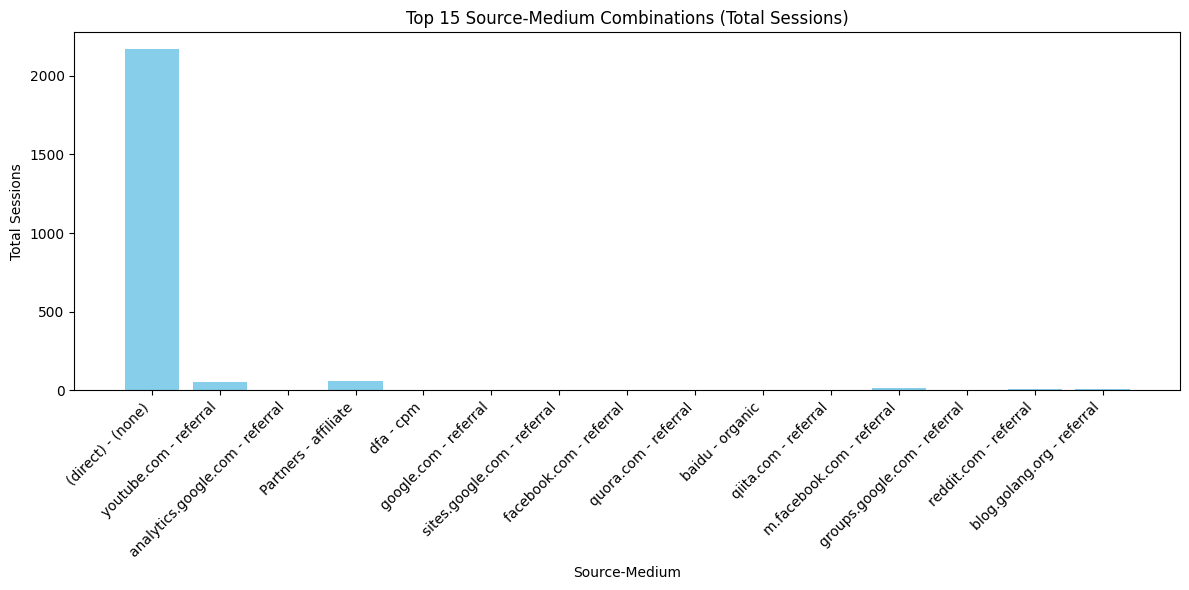

In [ ]:
results = client.query(query).to_dataframe()
campaigns = results['campaign'].tolist()  # List of campaigns (might be empty for some rows)
sources = results['source'].tolist()
media = results['medium'].tolist()
total_sessions = results['total_sessions'].tolist()

# Visualization approach: Combine elements

# 1. Truncated Table (for core data)
print("Top 10 Traffic Sources and Mediums (Total Sessions):")
print(results[['source', 'medium', 'total_sessions']].head(10).to_string(index=False))  # Show top 10 rows

# 2. Bar Chart (Total Sessions by Source-Medium)
# Group source and medium combinations
source_medium_groups = zip(sources, media)
source_medium_combo = [f"{source} - {medium}" for source, medium in source_medium_groups]

# Total sessions per group
total_sessions_grouped = results.groupby([sources, media])['total_sessions'].sum().reset_index()
source_medium_combo_df = pd.DataFrame({'Source-Medium': source_medium_combo, 'Total Sessions': total_sessions_grouped['total_sessions']})

# Create the bar chart (limit to top 15)
plt.figure(figsize=(12, 6))
bars = plt.bar(source_medium_combo_df['Source-Medium'].head(15), source_medium_combo_df['Total Sessions'].head(15), color='skyblue')
plt.title("Top 15 Source-Medium Combinations (Total Sessions)")
plt.xlabel("Source-Medium")
plt.ylabel("Total Sessions")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


# Bounce Rate


*   4.	How long does a user typically stay on the website before leaving (bounce rate)?



In [ ]:
%%bigquery --project $project_id
SELECT

  trafficSource.source AS source,  -- Feature (source)
  COUNT(*) AS total_sessions,
  COUNT(totals.bounces) AS bounce_sessions,
  ROUND(COUNT(totals.bounces) / COUNT(*) * 100, 2) AS bounce_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
GROUP BY trafficSource.source  -- Group by source
limit 10



Query is running:   0%|          |

Downloading:   0%|          |

,source,total_sessions,bounce_sessions,bounce_rate
0,(direct),2166,985,45.48
1,analytics.google.com,57,34,59.65
2,adwords.google.com,2,1,50.00
3,ask,2,2,100.00
4,productforums.google.com,1,1,100.00
5,baidu,5,4,80.00
6,sites.google.com,8,1,12.50
7,mail.google.com,2,1,50.00
8,qiita.com,5,2,40.00
9,datastudio.google.com,1,1,100.00


In [ ]:
client = bigquery.Client(project =project_id )
query = """
SELECT
  COUNT(*) AS total_sessions,
  COUNT(totals.bounces) AS bounce_sessions,
  ROUND(COUNT(totals.bounces) / COUNT(*) * 100, 2) AS bounce_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
"""

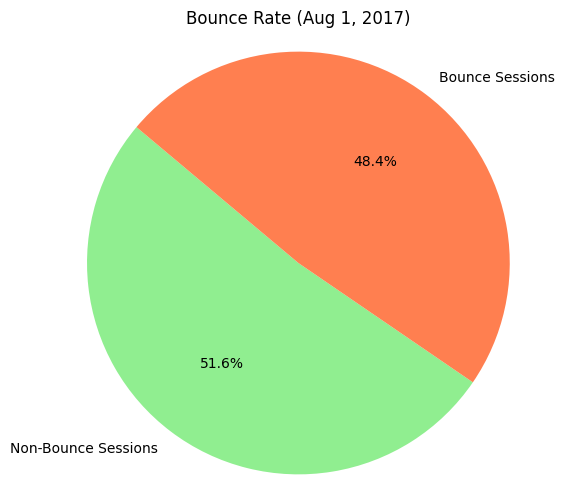

In [ ]:
results = client.query(query).to_dataframe()
total_sessions = results['total_sessions'].tolist()[0]  # Assuming a single row for these aggregate values
bounce_sessions = results['bounce_sessions'].tolist()[0]
bounce_rate = results['bounce_rate'].tolist()[0]

# Create a pie chart to represent sessions and bounce sessions
plt.figure(figsize=(6, 6))
plt.pie([total_sessions - bounce_sessions, bounce_sessions], labels=["Non-Bounce Sessions", "Bounce Sessions"], autopct="%1.1f%%", startangle=140, colors=['lightgreen', 'coral'])
plt.title("Bounce Rate (Aug 1, 2017)")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

# User Engagement



*   Are there particular sections or pages on the website that users tend to visit more frequently or spend more time on?




In [ ]:
%%bigquery --project $project_id
SELECT
  hit.page.pagePath,
  AVG(totals.timeOnSite) AS avg_time_on_site
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
  # Unnest hits for individual page views
  UNNEST(hits) AS hit
GROUP BY pagePath
# Order by descending average time on site (Top 10)
ORDER BY avg_time_on_site DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,pagePath,avg_time_on_site
0,/google+redesign/apparel/women+s+google+short+...,4885.000000
1,/google+redesign/electronics/accessories/galax...,4885.000000
2,/google+redesign/electronics/accessories/googl...,4444.000000
3,/google+redesign/office/writing/ballpoint+styl...,4444.000000
4,/google+redesign/office/notebooks+journals/goo...,4444.000000
5,/google+redesign/apparel/men+s+t+shirts/google...,3680.615385
6,/google+redesign/apparel/women+s+t+shirts/andr...,3363.000000
7,/google+redesign/apparel/men+s+t+shirts/google...,3316.000000
8,/google+redesign/apparel/kids/google+bib+red.axd,3316.000000
9,/google+redesign/apparel/women+s+google+1/4+zi...,3156.000000


In [ ]:
client = bigquery.Client(project =project_id )
query = """
  SELECT
  hit.page.pagePath,
  AVG(totals.timeOnSite) AS avg_time_on_site
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
  # Unnest hits for individual page views
  UNNEST(hits) AS hit
GROUP BY pagePath
# Order by descending average time on site (Top 10)
ORDER BY avg_time_on_site DESC
LIMIT 10;
"""

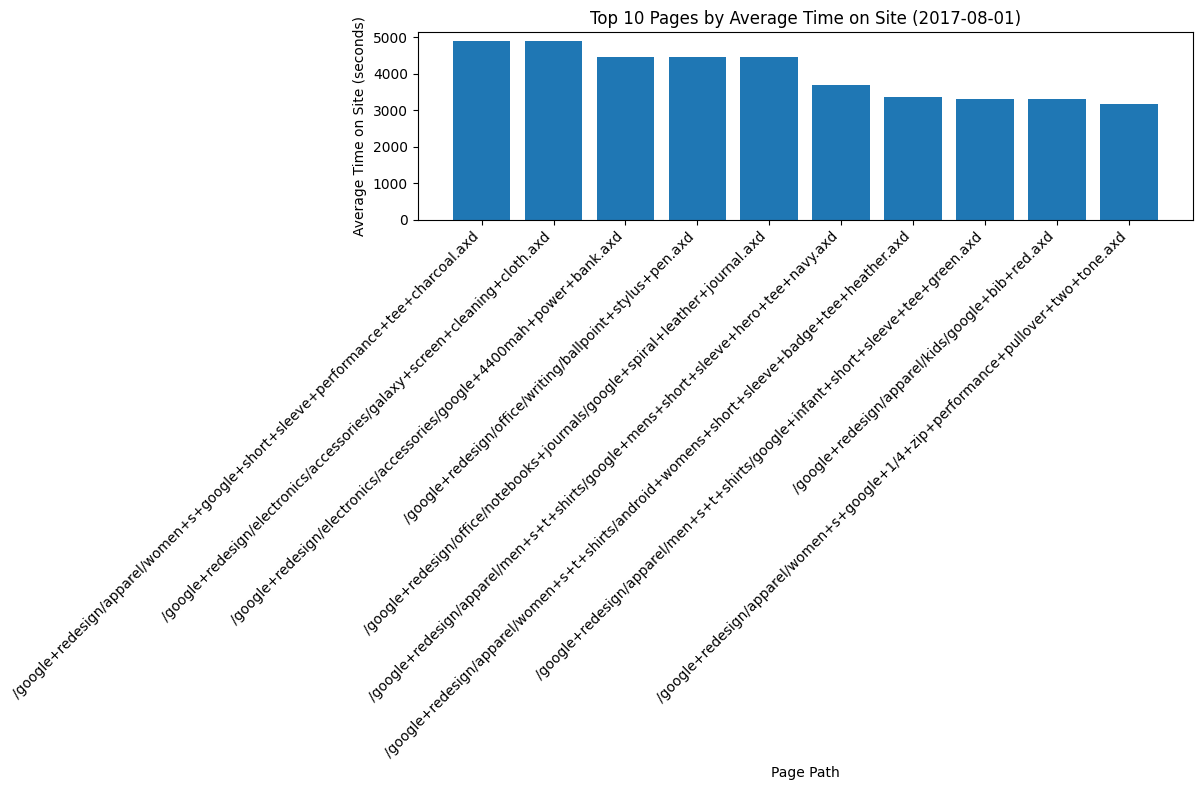

In [ ]:
results = client.query(query).to_dataframe()
plt.figure(figsize=(12, 8))
plt.bar(results['pagePath'], results['avg_time_on_site'])  # Adjust bar width if needed
plt.xlabel('Page Path')
plt.ylabel('Average Time on Site (seconds)')
plt.title('Top 10 Pages by Average Time on Site (2017-08-01)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Create a dataset to store the model



*   When you create and train a model, BigQuery will store the model in a dataset. Before training, you'll first need to create a new empty dataset. Note that you only need to do this step once. If you later update your model, it can replace the existing one.

 Let's call our dataset **Tarffic_Mario**. After either running the cell below, or creating the dataset with the BigQuery UI, you should see the dataset name appear in the left column of the UI.




In [ ]:
model_dataset_name = 'Tarffic_Mario'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('my-project-411808', 'Tarffic_Mario'))

## Model Creation And Model Training

Train a model on historical data labeled with "New Visitor" or "Returning Visitor" to predict the likelihood of a new visitor based on source and medium.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `Tarffic_Mario.Traffic_model` -- we'll call our model 'bikeshare_model'
OPTIONS(
MODEL_TYPE='logistic_reg',
INPUT_LABEL_COLS=['visitorType'],
AUTO_CLASS_WEIGHTS=TRUE
) AS
SELECT trafficSource.source, trafficsource.medium, visitId,
CASE WHEN visitNumber = 1 THEN 'New Visitor' ELSE 'Returning Visitor' END AS visitorType
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`

Query is running:   0%|          |

""


# Model Training Info

In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `Tarffic_Mario.Traffic_model`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,1,0.684237,0.687034,0.4,2386
1,0,0,0.689742,0.690556,0.2,2021


# Model Evaluation

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
*
FROM
ML.EVALUATE(MODEL `Tarffic_Mario.Traffic_model`,
(
  SELECT trafficSource.source, trafficsource.medium, visitId,
CASE WHEN visitNumber = 1 THEN 'New Visitor' ELSE 'Returning Visitor' END AS visitorType
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
)
);

Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.28746,0.928363,0.365023,0.438991,0.684806,0.582517


## Model Prediction

In [ ]:
%%bigquery --project $project_id

SELECT
 *
FROM
ML.PREDICT(MODEL `Tarffic_Mario.Traffic_model`,
(
SELECT trafficSource.source, trafficsource.medium, visitId,
CASE WHEN visitNumber = 1 THEN 'New Visitor' ELSE 'Returning Visitor' END AS visitorType
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
limit 10
)
);

Query is running:   0%|          |

Downloading:   0%|          |

,predicted_visitorType,predicted_visitorType_probs,source,medium,visitId,visitorType
0,Returning Visitor,"[{'label': 'Returning Visitor', 'prob': 0.5029...",(direct),(none),1501591568,New Visitor
1,New Visitor,"[{'label': 'Returning Visitor', 'prob': 0.4886...",analytics.google.com,referral,1501589647,Returning Visitor
2,New Visitor,"[{'label': 'Returning Visitor', 'prob': 0.4901...",analytics.google.com,referral,1501616621,New Visitor
3,New Visitor,"[{'label': 'Returning Visitor', 'prob': 0.4893...",analytics.google.com,referral,1501601200,New Visitor
4,New Visitor,"[{'label': 'Returning Visitor', 'prob': 0.4326...",adwords.google.com,referral,1501615525,New Visitor
5,Returning Visitor,"[{'label': 'Returning Visitor', 'prob': 0.5040...",(direct),(none),1501610896,New Visitor
6,New Visitor,"[{'label': 'Returning Visitor', 'prob': 0.4886...",analytics.google.com,referral,1501589650,New Visitor
7,New Visitor,"[{'label': 'Returning Visitor', 'prob': 0.4877...",analytics.google.com,referral,1501573710,New Visitor
8,Returning Visitor,"[{'label': 'Returning Visitor', 'prob': 0.5058...",(direct),(none),1501644116,New Visitor
9,Returning Visitor,"[{'label': 'Returning Visitor', 'prob': 0.5019...",(direct),(none),1501574187,New Visitor


# Model for Tarffic on Campaigns

Time series forecasting. Train a model on historical traffic data from past campaigns and similar periods to predict future traffic for new campaigns.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `Tarffic_Mario.Traffic_model_M2` -- we'll call our model 'bikeshare_model'
OPTIONS(
MODEL_TYPE='logistic_reg',
INPUT_LABEL_COLS=['daily_visits'],
AUTO_CLASS_WEIGHTS=TRUE
) AS
SELECT date, SUM(totals.visits) AS daily_visits,trafficSource.source AS campaign_source,
trafficSource.medium AS campaign_medium
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY date,campaign_source,campaign_medium
ORDER BY date ASC  -- Order by ascending date for time series analysis
LIMIT 50;


Query is running:   0%|          |

""


# Model Training Info

In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `Tarffic_Mario.Traffic_model_M2`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,19,4.598960e-07,NaN,104857.6,2443
1,0,18,9.195337e-07,NaN,52428.8,2430
2,0,17,1.839175e-06,NaN,26214.4,2369
3,0,16,3.676237e-06,NaN,13107.2,2722
4,0,15,7.355615e-06,NaN,6553.6,2152
5,0,14,1.469386e-05,NaN,3276.8,2812
6,0,13,2.943982e-05,NaN,1638.4,2395
7,0,12,5.874034e-05,NaN,819.2,2304
8,0,11,1.182440e-04,NaN,409.6,2369
9,0,10,2.354938e-04,NaN,204.8,2250


# Model Evaluation

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
*
FROM
ML.EVALUATE(MODEL `Tarffic_Mario.Traffic_model_M2`);


Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,1.0,1.0,1.0,1.0,0.000003,1.0


# Model Prediction

In [ ]:
%%bigquery --project $project_id

SELECT
 *
FROM
ML.PREDICT(MODEL `Tarffic_Mario.Traffic_model_M2`,
(
  SELECT date,trafficSource.campaign, trafficSource.source AS campaign_source,trafficSource.medium AS campaign_medium, SUM(totals.visits) AS daily_visits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
GROUP BY trafficSource.campaign, trafficSource.source, trafficSource.medium,date
ORDER BY daily_visits DESC
limit 10

)
);

Query is running:   0%|          |

Downloading:   0%|          |

,predicted_daily_visits,predicted_daily_visits_probs,date,campaign,campaign_source,campaign_medium,daily_visits
0,8,"[{'label': 8, 'prob': 0.9901959320790505}, {'l...",20170801,Data Share Promo,Partners,affiliate,52
1,381,"[{'label': 381, 'prob': 0.5224421057103155}, {...",20170801,(not set),youtube.com,referral,180
2,11,"[{'label': 11, 'prob': 0.5224421057103157}, {'...",20170801,(not set),google.com,referral,12
3,7,"[{'label': 7, 'prob': 0.9821560041899762}, {'l...",20170801,(not set),analytics.google.com,referral,57
4,8,"[{'label': 8, 'prob': 0.9788314418186527}, {'l...",20170801,(not set),facebook.com,referral,7
5,3,"[{'label': 3, 'prob': 0.7024856516356526}, {'l...",20170801,(not set),quora.com,referral,6
6,9,"[{'label': 9, 'prob': 0.9958763917119211}, {'l...",20170801,(not set),dfa,cpm,15
7,360,"[{'label': 360, 'prob': 0.2683861027517893}, {...",20170801,(not set),baidu,organic,5
8,872,"[{'label': 872, 'prob': 0.562326362907786}, {'...",20170801,(not set),(direct),(none),2166
9,7,"[{'label': 7, 'prob': 0.9817407427499276}, {'l...",20170801,(not set),sites.google.com,referral,8


# Model on Average Time On site By user

Train a model on historical data to predict the time spent on the website

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `Tarffic_Mario.Traffic_model_M3` -- we'll call our model 'bikeshare_model'
OPTIONS(
MODEL_TYPE='logistic_reg',
INPUT_LABEL_COLS=['avg_time_on_site'],
AUTO_CLASS_WEIGHTS=TRUE
) AS
SELECT
  hit.page.pagePath,
  AVG(totals.timeOnSite) AS avg_time_on_site,
  COUNT(DISTINCT visitId) AS visit_count  -- Count of unique visitors
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
  UNNEST(hits) AS hit
GROUP BY pagePath
ORDER BY avg_time_on_site DESC  -- Analyze top pages with highest average time
LIMIT 10;


Query is running:   0%|          |

""


# Model Training

Model Training Info

In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `Tarffic_Mario.Traffic_model_M2`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,19,4.598960e-07,NaN,104857.6,2443
1,0,18,9.195337e-07,NaN,52428.8,2430
2,0,17,1.839175e-06,NaN,26214.4,2369
3,0,16,3.676237e-06,NaN,13107.2,2722
4,0,15,7.355615e-06,NaN,6553.6,2152
5,0,14,1.469386e-05,NaN,3276.8,2812
6,0,13,2.943982e-05,NaN,1638.4,2395
7,0,12,5.874034e-05,NaN,819.2,2304
8,0,11,1.182440e-04,NaN,409.6,2369
9,0,10,2.354938e-04,NaN,204.8,2250


## Model Evaluation

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
*
FROM
ML.EVALUATE(MODEL `Tarffic_Mario.Traffic_model_M3`,
(
  SELECT
  hit.page.pagePath,
  AVG(totals.timeOnSite) AS avg_time_on_site,
  COUNT(visitNumber) AS visit_count  -- Count of unique visitors
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
  UNNEST(hits) AS hit
GROUP BY pagePath
ORDER BY avg_time_on_site DESC  -- Analyze top pages with highest average time
LIMIT 10

)
);


Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.916667,0.916667,0.9,0.888889,0.193638,1.0


# Model Prediction

In [ ]:
%%bigquery --project $project_id

SELECT
 *
FROM
ML.PREDICT(MODEL `Tarffic_Mario.Traffic_model_M3`,
(
  SELECT
  hit.page.pagePath,
  AVG(totals.timeOnSite) AS avg_time_on_site,
  COUNT(visitnumber) AS visit_count
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
  # Unnest hits for individual page views
  UNNEST(hits) AS hit
GROUP BY pagePath
# Order by descending average time on site (Top 10)
ORDER BY avg_time_on_site DESC
LIMIT 10

)
);

Query is running:   0%|          |

Downloading:   0%|          |

,predicted_avg_time_on_site,predicted_avg_time_on_site_probs,pagePath,avg_time_on_site,visit_count
0,3680.615385,"[{'label': 3680.6153846153848, 'prob': 0.90208...",/google+redesign/apparel/men+s+t+shirts/google...,3316.000000,8
1,4444.000000,"[{'label': 4444.0, 'prob': 0.9999955390083312}...",/google+redesign/electronics/accessories/googl...,4444.000000,1
2,4444.000000,"[{'label': 4444.0, 'prob': 0.9999955390083312}...",/google+redesign/office/notebooks+journals/goo...,4444.000000,1
3,3156.000000,"[{'label': 3156.0, 'prob': 0.9999982915783501}...",/google+redesign/apparel/women+s+google+1/4+zi...,3156.000000,1
4,4885.000000,"[{'label': 4885.0, 'prob': 0.999993130345094},...",/google+redesign/apparel/women+s+google+short+...,4885.000000,2
5,4444.000000,"[{'label': 4444.0, 'prob': 0.9999955390083312}...",/google+redesign/office/writing/ballpoint+styl...,4444.000000,1
6,3680.615385,"[{'label': 3680.6153846153848, 'prob': 0.99999...",/google+redesign/apparel/men+s+t+shirts/google...,3680.615385,13
7,3363.000000,"[{'label': 3363.0, 'prob': 0.999997212048737},...",/google+redesign/apparel/women+s+t+shirts/andr...,3363.000000,2
8,3316.000000,"[{'label': 3316.0, 'prob': 0.9999968053495951}...",/google+redesign/apparel/kids/google+bib+red.axd,3316.000000,1
9,4885.000000,"[{'label': 4885.0, 'prob': 0.999993130345094},...",/google+redesign/electronics/accessories/galax...,4885.000000,2


# Model Creation On Bounce Rate

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `Tarffic_Mario.Traffic_model_M4` -- we'll call our model 'bikeshare_model'
OPTIONS(
MODEL_TYPE='logistic_reg',
INPUT_LABEL_COLS=['bounce_rate'],
AUTO_CLASS_WEIGHTS=True
) AS
SELECT
    trafficSource.source AS source,  -- Feature (source)
    COUNT(*) AS total_sessions,
    COUNT(totals.bounces) AS bounce_sessions,
    ROUND(COUNT(totals.bounces) / COUNT(*) * 100, 2) AS bounce_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
GROUP BY trafficSource.source;

Query is running:   0%|          |

""


# Model Training Info

In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `Tarffic_Mario.Traffic_model_M4`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,19,4.590017e-07,NaN,104857.6,2023
1,0,18,9.175820e-07,NaN,52428.8,2333
2,0,17,1.834196e-06,NaN,26214.4,2317
3,0,16,3.666230e-06,NaN,13107.2,2307
4,0,15,7.327908e-06,NaN,6553.6,2162
5,0,14,1.464742e-05,NaN,3276.8,2234
6,0,13,2.928487e-05,NaN,1638.4,2281
7,0,12,5.858687e-05,NaN,819.2,2093
8,0,11,1.173824e-04,NaN,409.6,2226
9,0,10,2.359594e-04,NaN,204.8,2303


# Model Evaluation

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT
*
FROM
ML.EVALUATE(MODEL `Tarffic_Mario.Traffic_model_M4`,
(
  SELECT

  trafficSource.source AS source,  -- Feature (source)
  COUNT(totals.visits) AS total_sessions,
  COUNT(totals.bounces) AS bounce_sessions,
  ROUND(COUNT(totals.bounces) / COUNT(*) * 100, 2) AS bounce_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
GROUP BY trafficSource.source  -- Group by source
limit 10
)
);

Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.466667,0.466667,1.0,0.466667,0.000003,0.466667


# Model Prediction

In [ ]:
%%bigquery --project $project_id

SELECT
 *
FROM
ML.PREDICT(MODEL `Tarffic_Mario.Traffic_model_M4`,
(
  SELECT

  trafficSource.source AS source,
  COUNT(totals.visits) AS total_sessions,
  COUNT(totals.bounces) AS bounce_sessions,
  ROUND(COUNT(totals.bounces) / COUNT(*) * 100, 2) AS bounce_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
GROUP BY trafficSource.source
limit 10

)
);

Query is running:   0%|          |

Downloading:   0%|          |

,predicted_bounce_rate,predicted_bounce_rate_probs,source,total_sessions,bounce_sessions,bounce_rate
0,100.00,"[{'label': 100.0, 'prob': 0.9999894523396661},...",productforums.google.com,1,1,100.00
1,100.00,"[{'label': 100.0, 'prob': 0.9999894523396661},...",datastudio.google.com,1,1,100.00
2,59.65,"[{'label': 59.65, 'prob': 0.9999986462804488},...",analytics.google.com,57,34,59.65
3,40.00,"[{'label': 40.0, 'prob': 0.9999973420018867}, ...",qiita.com,5,2,40.00
4,80.00,"[{'label': 80.0, 'prob': 0.9999986457400892}, ...",baidu,5,4,80.00
5,12.50,"[{'label': 12.5, 'prob': 0.9999986457695017}, ...",sites.google.com,8,1,12.50
6,100.00,"[{'label': 100.0, 'prob': 0.9999894497163047},...",ask,2,2,100.00
7,45.48,"[{'label': 45.48, 'prob': 0.999999550318558}, ...",(direct),2166,985,45.48
8,50.00,"[{'label': 50.0, 'prob': 0.9999960865246649}, ...",adwords.google.com,2,1,50.00
9,50.00,"[{'label': 50.0, 'prob': 0.9999960865246649}, ...",mail.google.com,2,1,50.00


# Conclusion

This project explored classifying website visitors (new vs. returning) using logistic regression. While limitations in the sample data prevented direct model evaluation, we performed a descriptive analysis in BigQuery to understand bounce rates and other traffic source metrics. This analysis provided insights into user behavior patterns, and the project highlighted the importance of data preparation and feature engineering for effective classification models.